# Derivatives, errors and multi-processing

In this notebook we demonstrate an example of taking a very simple numerical derivative, explore the round-off error, and in passing introduce multi-processing.

## Numerical derivatives

**Literature:** Numerical Recipies, Ch. 5.7


The derivative $\frac{df}{dx}$ of a function $y=f(x)$ can be approximated by the difference equation 
$$ f'(x) \approx \frac{f(x+h) -f(x)}{h}.$$

Say we have the following function:

In [6]:
def func1(x):
    return x**2

We can plot this function:

Populating the interactive namespace from numpy and matplotlib


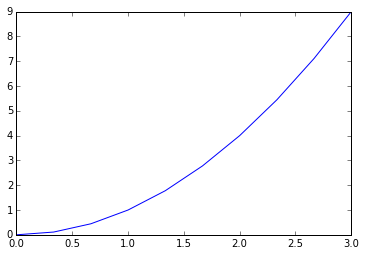

In [7]:
%pylab inline
x=linspace(0,3,10)
plot(x,func1(x))

Now, we create a function for the derivative:

In [8]:
def deriv1(f,x,h):
    dfdx = (f(x+h) - f(x))/h
    return dfdx

You should try the deriv function call below with different values of h. At which h does round-off error dominate?

In [9]:
deriv1(func1,1,0.0001)

2.000099999999172

((0, -16),
 <matplotlib.text.Text at 0x108091910>)

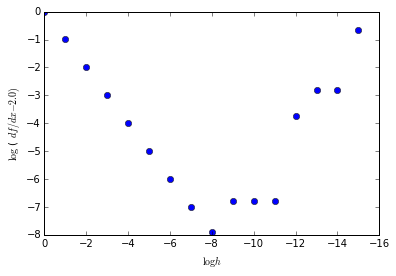

In [11]:
def hdev(h):                   # in order to vectorize wrap the function to isolate the 
    return deriv1(func1,1,h)   # variable over which we should loop
vhdev=vectorize(hdev)        # turn a scalar function into a vectorized function
h_pow = range(0,-16,-1)
h = 10**array(h_pow,dtype=float)
plot(h_pow,log10(abs(vhdev(h)-2.)),'o')
xlim(0,-16), ylabel('$ \log$ ( $df/dx - 2.0 ) $'),xlabel('$\log h$')

##### This way of vectorizing is just done for convenience, but it will not help performance. The following introduces an actual multiprocessing approach that will use multiple of your cpu cores. The work is too small to notice any difference in performance though. 

In [68]:
from multiprocessing import Pool

[ 3.          2.1         2.01        2.001       2.0001      2.00001
  2.000001    2.0000001   1.99999999  2.00000017  2.00000017  2.00000017
  2.0001778   1.99840144  1.99840144  2.22044605]


((0, -16),
 <matplotlib.text.Text at 0x11871c790>)

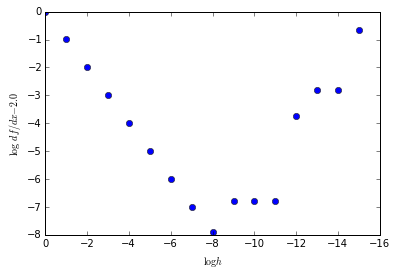

In [82]:
p = Pool(3)
h_error = array(p.map(hdev,h))
print h_error
plot(h_pow,log10(abs(h_error-2.)),'o')
xlim(0,-16), ylabel('$ \log$ $df/dx - 2.0 $'),xlabel('$\log h$')


## Errors
What are the errors associated with evaluating the derivative this way? There are two basic sources of error! They have to do with accuracy and with precision.

**Accuracy:** How well does the discretized equation represent the original mathematical equation?
This is the truncation error. 

**Precision:** How well is the solution satisfying the discretised equation? This is limited by the roundoff error.
